In [ ]:
# installing the kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Importing the kaggle dataset for Dog-Cat  -   kaggle API
!kaggle datasets download -d hemalathaaae/dog-vs-cat-dataset

Dataset URL: https://www.kaggle.com/datasets/hemalathaaae/dog-vs-cat-dataset
License(s): MIT
100% 814M/817M [00:47<00:00, 19.8MB/s]
100% 817M/817M [00:47<00:00, 18.0MB/s]


In [ ]:
# for getting info about all the files :
!ls


cat2.jpg  dog2.webp  dog-vs-cat-dataset.zip  sample_data


In [ ]:
# extracting the compressed dataset //
from zipfile import ZipFile
dataset = '/content/dog-vs-cat-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [ ]:
# As there is no zip for train and test sets , we just opened the folders

In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
# Printing the names of all the images

file_names = os.listdir('/content/train/train')
print(file_names)

['dog.5876.jpg', 'cat.6199.jpg', 'cat.4917.jpg', 'cat.8061.jpg', 'dog.2979.jpg', 'cat.8493.jpg', 'cat.4911.jpg', 'dog.6326.jpg', 'dog.2422.jpg', 'dog.7055.jpg', 'dog.10003.jpg', 'dog.5191.jpg', 'cat.7351.jpg', 'cat.10948.jpg', 'dog.6383.jpg', 'dog.7245.jpg', 'dog.11957.jpg', 'cat.8387.jpg', 'cat.5667.jpg', 'dog.1549.jpg', 'dog.3966.jpg', 'dog.10231.jpg', 'dog.4187.jpg', 'cat.8739.jpg', 'dog.6587.jpg', 'dog.430.jpg', 'dog.4.jpg', 'cat.7644.jpg', 'dog.9826.jpg', 'dog.4321.jpg', 'cat.7145.jpg', 'dog.6227.jpg', 'dog.5593.jpg', 'dog.8677.jpg', 'dog.9346.jpg', 'cat.496.jpg', 'cat.10044.jpg', 'cat.3050.jpg', 'cat.7182.jpg', 'dog.9271.jpg', 'cat.1062.jpg', 'dog.2070.jpg', 'cat.3341.jpg', 'cat.8237.jpg', 'dog.1891.jpg', 'dog.561.jpg', 'dog.3356.jpg', 'cat.1489.jpg', 'cat.788.jpg', 'cat.2010.jpg', 'dog.9277.jpg', 'dog.9946.jpg', 'dog.4957.jpg', 'dog.3955.jpg', 'dog.6748.jpg', 'cat.6685.jpg', 'cat.2737.jpg', 'dog.5326.jpg', 'cat.2516.jpg', 'dog.7621.jpg', 'cat.351.jpg', 'dog.8356.jpg', 'cat.754.j

In [ ]:
# importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
# computer vision is not allowed to show images in google colab , so colab provided a library to do so separately
from google.colab.patches import cv2_imshow

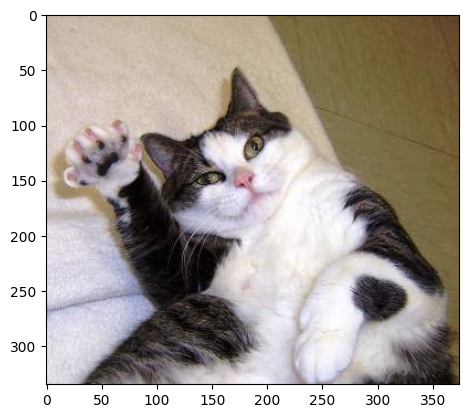

In [ ]:
# Displaying the images of cats and dogs we're having
cat_image = mpimg.imread('/content/train/train/cat.8621.jpg')
img_plot = plt.imshow(cat_image)
plt.show()

In [ ]:
cat_image.shape

(335, 374, 3)

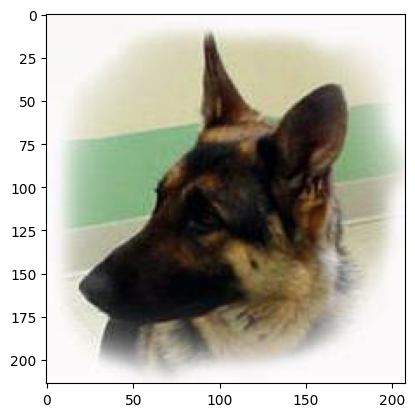

In [ ]:
dog_image = mpimg.imread('/content/train/train/dog.10441.jpg')
img_plot = plt.imshow(dog_image)
plt.show()

In [ ]:
dog_image.shape

(214, 208, 3)

In [ ]:
# all the images are having different sizes , so we've to resize them to common size

# A quick way to know about which image contains dog or cat it to check its name , if dog -->> dog else its a cat
file_names = os.listdir('/content/train/train')

for i in range(9) :
  name = file_names[i]
  print(name[0:3])

dog
dog
dog
cat
dog
dog
cat
dog
cat


In [ ]:
# that's good !
# now we'll count how many cats and dogs are there

file_names = os.listdir('/content/train/train')
dog,cat=0,0
for file in file_names :
  if file[0:3]=='dog':
    dog+=1
  else :
    cat+=1

print('No. of cats = ', cat)
print('No. of dogs = ', dog)

No. of cats =  12500
No. of dogs =  12500


In [ ]:
# what we'll do now is , check all the images and their names , access them from old directory , resize them and fill into a newly made directory for resized images.

os.mkdir('/content/resized_images')

In [ ]:
original_folder = '/content/train/train/'
new_folder = '/content/resized_images/'
# we need not fill all the images , instead we need a small dataset of ~2000 images to just fine tune an existing model
for i in range(2000):
  filenames = os.listdir(original_folder)
  filename = filenames[i]
  path = original_folder + filename
  # using matplotlib for accessing the image
  img = Image.open(path)
  img = img.resize((224,224))
  # now it has become a grayscale image , so we need it to get converted to rgb
  img = img.convert('RGB')

  # now finally we've to save the newly made 'img' into the corresponding path in new folder //
  new_path = new_folder+filename
  img.save(new_path)


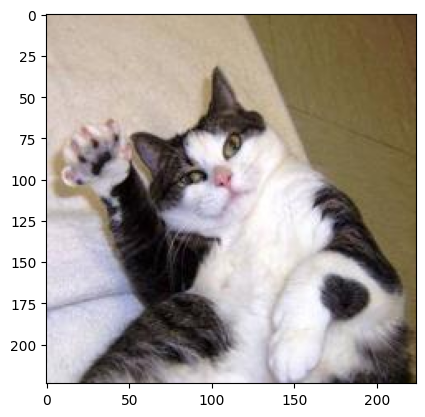

In [ ]:
# now test whether the required things happened or not

# Displaying the images of cats and dogs we're having
cat_image = mpimg.imread('/content/resized_images/cat.8621.jpg')
img_plot = plt.imshow(cat_image)
plt.show()

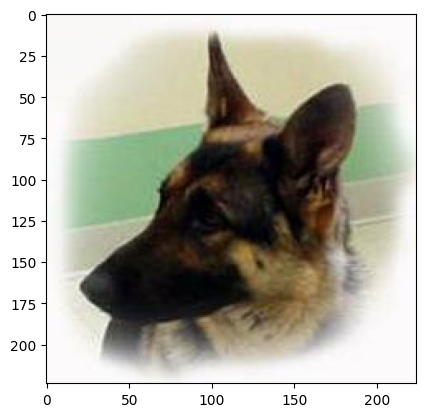

In [ ]:
dog_image = mpimg.imread('/content/resized_images/dog.10441.jpg')
img_plot = plt.imshow(dog_image)
plt.show()

In [ ]:
# crezi crezi //

# Creating labels for resized images , according to first three characters of file name

# 1 ---> Dog
# 0 ---> Cat

labels = []
filenames = os.listdir('/content/resized_images')

for i in range(2000):
  file = filenames[i]
  category = file[0:3]
  if category == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [ ]:
print(labels)

[1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [ ]:
print(filenames)

['dog.12317.jpg', 'dog.8372.jpg', 'dog.1310.jpg', 'cat.286.jpg', 'dog.5753.jpg', 'dog.8051.jpg', 'cat.9871.jpg', 'dog.10931.jpg', 'cat.1624.jpg', 'cat.5387.jpg', 'dog.4890.jpg', 'dog.3339.jpg', 'dog.1863.jpg', 'cat.7592.jpg', 'dog.11753.jpg', 'cat.6634.jpg', 'dog.3295.jpg', 'dog.11655.jpg', 'cat.10366.jpg', 'dog.7495.jpg', 'dog.6404.jpg', 'dog.2664.jpg', 'dog.12470.jpg', 'dog.5191.jpg', 'cat.5047.jpg', 'cat.11734.jpg', 'cat.4985.jpg', 'cat.105.jpg', 'dog.265.jpg', 'dog.3755.jpg', 'cat.5189.jpg', 'dog.5975.jpg', 'dog.12112.jpg', 'cat.11050.jpg', 'dog.10300.jpg', 'cat.4343.jpg', 'cat.11317.jpg', 'dog.7924.jpg', 'dog.4611.jpg', 'cat.7868.jpg', 'cat.617.jpg', 'dog.1385.jpg', 'dog.8432.jpg', 'cat.4639.jpg', 'cat.10933.jpg', 'dog.2400.jpg', 'cat.3687.jpg', 'dog.9834.jpg', 'cat.2399.jpg', 'dog.10416.jpg', 'cat.6383.jpg', 'cat.8746.jpg', 'cat.6169.jpg', 'dog.1636.jpg', 'dog.7259.jpg', 'dog.3766.jpg', 'dog.9211.jpg', 'cat.2323.jpg', 'cat.432.jpg', 'cat.11701.jpg', 'cat.7248.jpg', 'dog.10162.jpg

In [ ]:
# counting the cats and dogs in this resized_images , so that we can get a balanced dataset

file_names = os.listdir('/content/resized_images')
dog,cat=0,0
for file in file_names :
  if file[0:3]=='dog':
    dog+=1
  else :
    cat+=1

print('No. of cats = ', cat)
print('No. of dogs = ', dog)

No. of cats =  1004
No. of dogs =  996


In [ ]:
# thats a pretty balanced data

# cv2 will read all the images and convert them to numpy arrays
import cv2
import glob

image_directory = '/content/resized_images/'
image_extension = ['png','jpg']
files=[]
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
# cv2 makes every image/file a numpy array , after that we made all images a numpy array
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [ ]:
# quite obvious //
print(dog_cat_images)

[[[[ 75  97  92]
   [ 65  87  82]
   [ 22  44  39]
   ...
   [144 153 150]
   [128 137 134]
   [142 151 148]]

  [[ 59  81  76]
   [ 55  77  72]
   [ 31  53  48]
   ...
   [137 146 143]
   [117 126 123]
   [129 138 135]]

  [[ 41  62  59]
   [ 43  64  61]
   [ 42  63  60]
   ...
   [132 141 138]
   [116 125 122]
   [132 141 138]]

  ...

  [[ 40  50  67]
   [ 44  55  69]
   [ 33  47  59]
   ...
   [104 116 120]
   [101 113 117]
   [101 113 117]]

  [[ 28  38  55]
   [ 41  52  66]
   [ 33  47  59]
   ...
   [105 117 121]
   [103 115 119]
   [102 114 118]]

  [[ 28  38  55]
   [ 37  48  62]
   [ 22  35  49]
   ...
   [102 114 118]
   [102 114 118]
   [101 113 117]]]


 [[[ 92 108 154]
   [ 99 115 161]
   [108 124 170]
   ...
   [172 175 173]
   [170 171 167]
   [172 173 169]]

  [[ 98 114 160]
   [102 118 164]
   [108 124 170]
   ...
   [171 174 172]
   [177 178 176]
   [185 186 182]]

  [[102 118 164]
   [104 120 166]
   [105 121 167]
   ...
   [165 167 167]
   [170 172 172]
   [178 181

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
# we're doing so just to make the variables look clean

X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
# train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1600, 224, 224, 3)
(1600,)
(400, 224, 224, 3)
(400,)


In [ ]:
# Scaling our data

X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train)

[[[[0.50980392 0.49019608 0.57254902]
   [0.51764706 0.50196078 0.57647059]
   [0.52941176 0.5254902  0.58823529]
   ...
   [0.05882353 0.05882353 0.10588235]
   [0.02745098 0.03137255 0.08627451]
   [0.02745098 0.03137255 0.08627451]]

  [[0.51372549 0.49411765 0.57647059]
   [0.5254902  0.50980392 0.58431373]
   [0.5372549  0.53333333 0.59607843]
   ...
   [0.03921569 0.03921569 0.08627451]
   [0.01176471 0.01568627 0.07058824]
   [0.04705882 0.05098039 0.10588235]]

  [[0.50980392 0.50196078 0.57647059]
   [0.52156863 0.51372549 0.58823529]
   [0.54117647 0.5372549  0.6       ]
   ...
   [0.08627451 0.08627451 0.13333333]
   [0.03921569 0.04313725 0.09803922]
   [0.07843137 0.08235294 0.1372549 ]]

  ...

  [[0.2        0.3254902  0.58431373]
   [0.21960784 0.34901961 0.61960784]
   [0.26666667 0.39607843 0.66666667]
   ...
   [0.05098039 0.20392157 0.56470588]
   [0.03921569 0.20784314 0.57254902]
   [0.04313725 0.21568627 0.58039216]]

  [[0.21568627 0.33333333 0.58823529]
   [0.2

In [ ]:
print(X_test)

[[[[0.32941176 0.2        0.1372549 ]
   [0.34901961 0.23921569 0.17254902]
   [0.3372549  0.23921569 0.17647059]
   ...
   [0.26666667 0.36862745 0.34509804]
   [0.30196078 0.40784314 0.39215686]
   [0.28627451 0.39215686 0.37647059]]

  [[0.34901961 0.21568627 0.15294118]
   [0.36078431 0.24313725 0.17647059]
   [0.3372549  0.23921569 0.17647059]
   ...
   [0.25490196 0.36470588 0.34117647]
   [0.30196078 0.40784314 0.39215686]
   [0.28235294 0.4        0.38039216]]

  [[0.37647059 0.23529412 0.17254902]
   [0.37647059 0.24705882 0.18431373]
   [0.34509804 0.24313725 0.18039216]
   ...
   [0.24313725 0.36078431 0.34117647]
   [0.29411765 0.41176471 0.39215686]
   [0.27843137 0.40392157 0.38431373]]

  ...

  [[0.24313725 0.23921569 0.25490196]
   [0.23137255 0.22745098 0.24313725]
   [0.21568627 0.21176471 0.22745098]
   ...
   [0.6745098  0.69019608 0.69411765]
   [0.67843137 0.69411765 0.69803922]
   [0.6745098  0.69019608 0.69411765]]

  [[0.22745098 0.22352941 0.23137255]
   [0.2

In [ ]:
# import tensorflow_hub as hub
# m = tf.keras.Sequential([
#     hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4", output_shape=[1280],
#                    trainable=False),  # Can be True, see below.
#     tf.keras.layers.Dense(num_classes, activation='softmax')
# ])
# m.build([None, 224, 224, 3])  # Batch input shape.

In [ ]:
# Building the Neural Network //

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [ ]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 8s 40ms/step - loss: 0.2286 - accuracy: 0.9000
Epoch 2/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0671 - accuracy: 0.9831
Epoch 3/5
50/50 [==============================] - 2s 45ms/step - loss: 0.0516 - accuracy: 0.9869
Epoch 4/5
50/50 [==============================] - 2s 41ms/step - loss: 0.0394 - accuracy: 0.9887
Epoch 5/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0334 - accuracy: 0.9912


In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print('Accuracy over test set : ', accuracy)
print('Loss over test set : ', loss)

13/13 [==============================] - 15s 1s/step - loss: 0.0458 - accuracy: 0.9825
Accuracy over test set :  0.9825000166893005
Loss over test set :  0.045754317194223404


In [ ]:
# Thats a pretty good accuracy

Please enter the path for which you wanna predict : /content/cat2.jpg


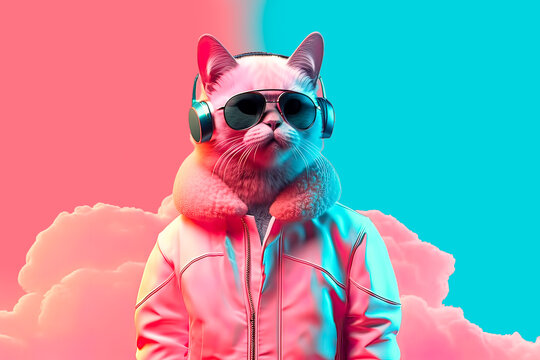

1/1 [==============================] - 0s 48ms/step
Your animal is a cat !


In [ ]:
# Building a predictive system - model should be able to tell whether a given image is dog(1) or cat(0)

input_path = input('Please enter the path for which you wanna predict : ')
input_img = cv2.imread(input_path)
cv2_imshow(input_img)
input_img_resized = cv2.resize(input_img,(224,224))
input_img_reshaped = np.reshape(input_img_resized,[1,224,224,3])
prediction = model.predict(input_img_reshaped)
label = np.argmax(prediction)
if label==1:
  print('Your animal is a dog !')
else:
  print('Your animal is a cat !')

In [ ]:
print('Thats really a nice project !')

Thats really a nice project !


In [ ]:
print('20+ LPA pls bg')

20+ LPA pls bg
